## Pima-Indian-Diabetes dataset analysis and prediction
1. Load the dataset
2. Exploratory data analysis  
3. Outlier removal, handling the imbalanced dataset and data scaling
4. Split the dataset into train and test datasets
5. Model building and selecting the model with highest evaluation metric
6. Save the finalized model

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import shapiro
import scipy.signal
from scipy import signal
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
#from ydata_profiling import ProfileReport
import seaborn as sns
from sklearn.utils import resample
%matplotlib inline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

import joblib

In [9]:
df=pd.read_csv('PIMA_Indian_diabetes_dataset.csv')

#### Here the target column has 2 values: Non-diabetic and diabetic patient records
For computation purpose,<br>
- 65% data belongs to non-diabetic class 
- 35% data belongs to diabetic class

In [10]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
#Split the dataframe for data analysis
df_feat = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_target = df[['Outcome']]

In [13]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### Exploratory data analysis
#### a. Check for missing values
This cell will check if any null values are present in the dataset and return features with null values.

In [14]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
if any(df[features_with_na].isnull().any()):
    for feature in features_with_na:
        print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')
else:
    print("No missing values in the selected features.")

No missing values in the selected features.


<Axes: >

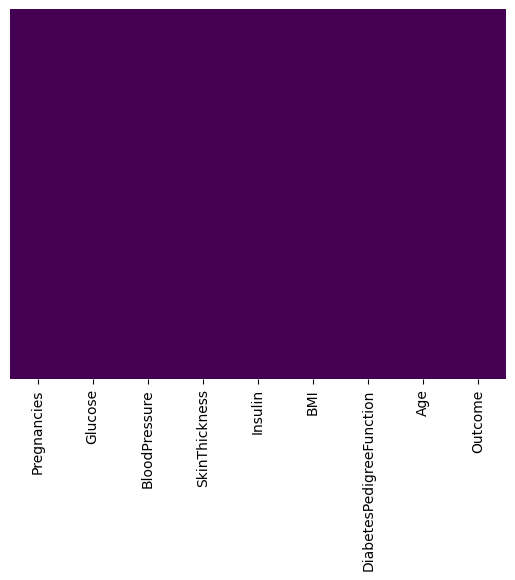

In [15]:
# Heatmap to see where visualize the missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### b. Check if the dataset is balanced

<Axes: xlabel='Outcome', ylabel='count'>

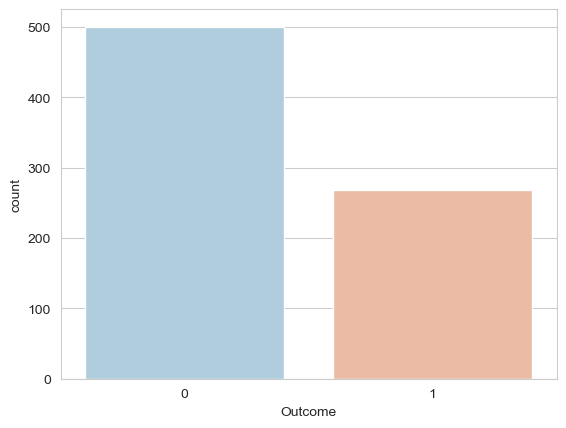

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=df_target,palette='RdBu_r')

The dataset is imbalanced. Dataset is balanced using 'resample' method from 'Scikit learn' after EDA section.

#### c. Get a statistical summary of the dataset and its columns

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### d. Plot histogram of each feature to check distribution of each feature

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

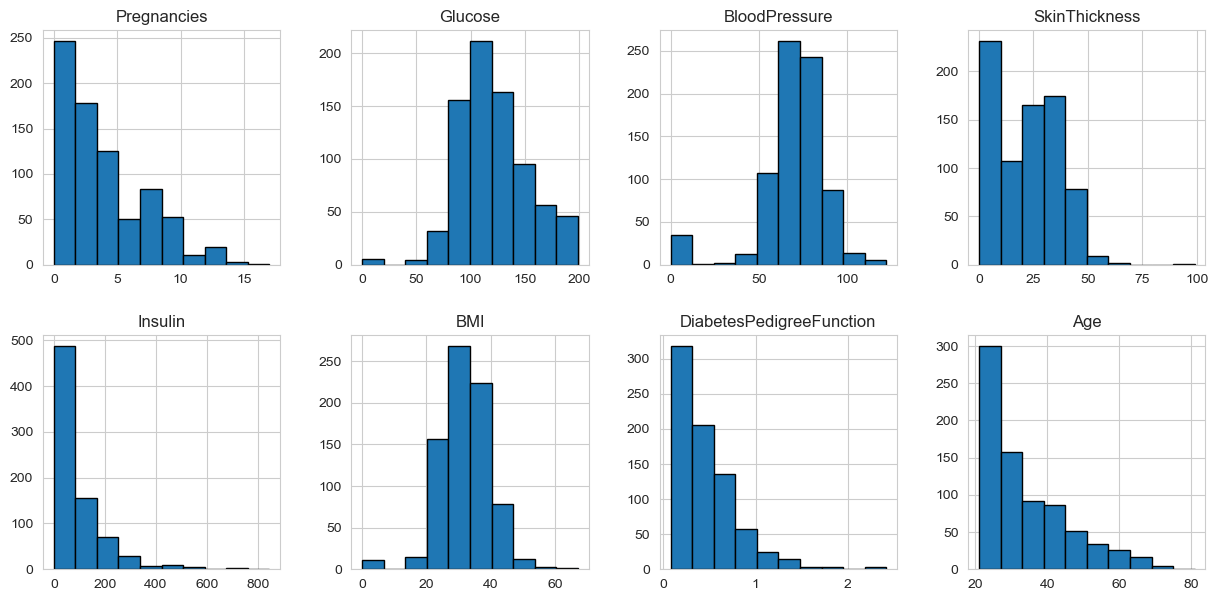

In [18]:
#Define format for subplots
fig, axis = plt.subplots(2, 4, figsize=(15,7))

#create histogram for each column in DataFrame
df_feat.hist(ax=axis, edgecolor='black', grid=True)

#### d. Check normality of dataset

In [19]:
# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(df)

C:\Users\INGALN01\AppData\Local\anaconda3\envs\venv\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
# Print the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Sample looks normally distributed (fail to reject H0)")
else:
    print("Sample does not look normally distributed (reject H0)")

Shapiro-Wilk Test Statistic: 0.6918020844459534
P-value: 0.0
Sample does not look normally distributed (reject H0)


#### e. Create Correlation matrix with heatmap to check correlation between features and target variable

In [21]:
#Correlation with respect to target variable
correlation_matrix =df.corr()

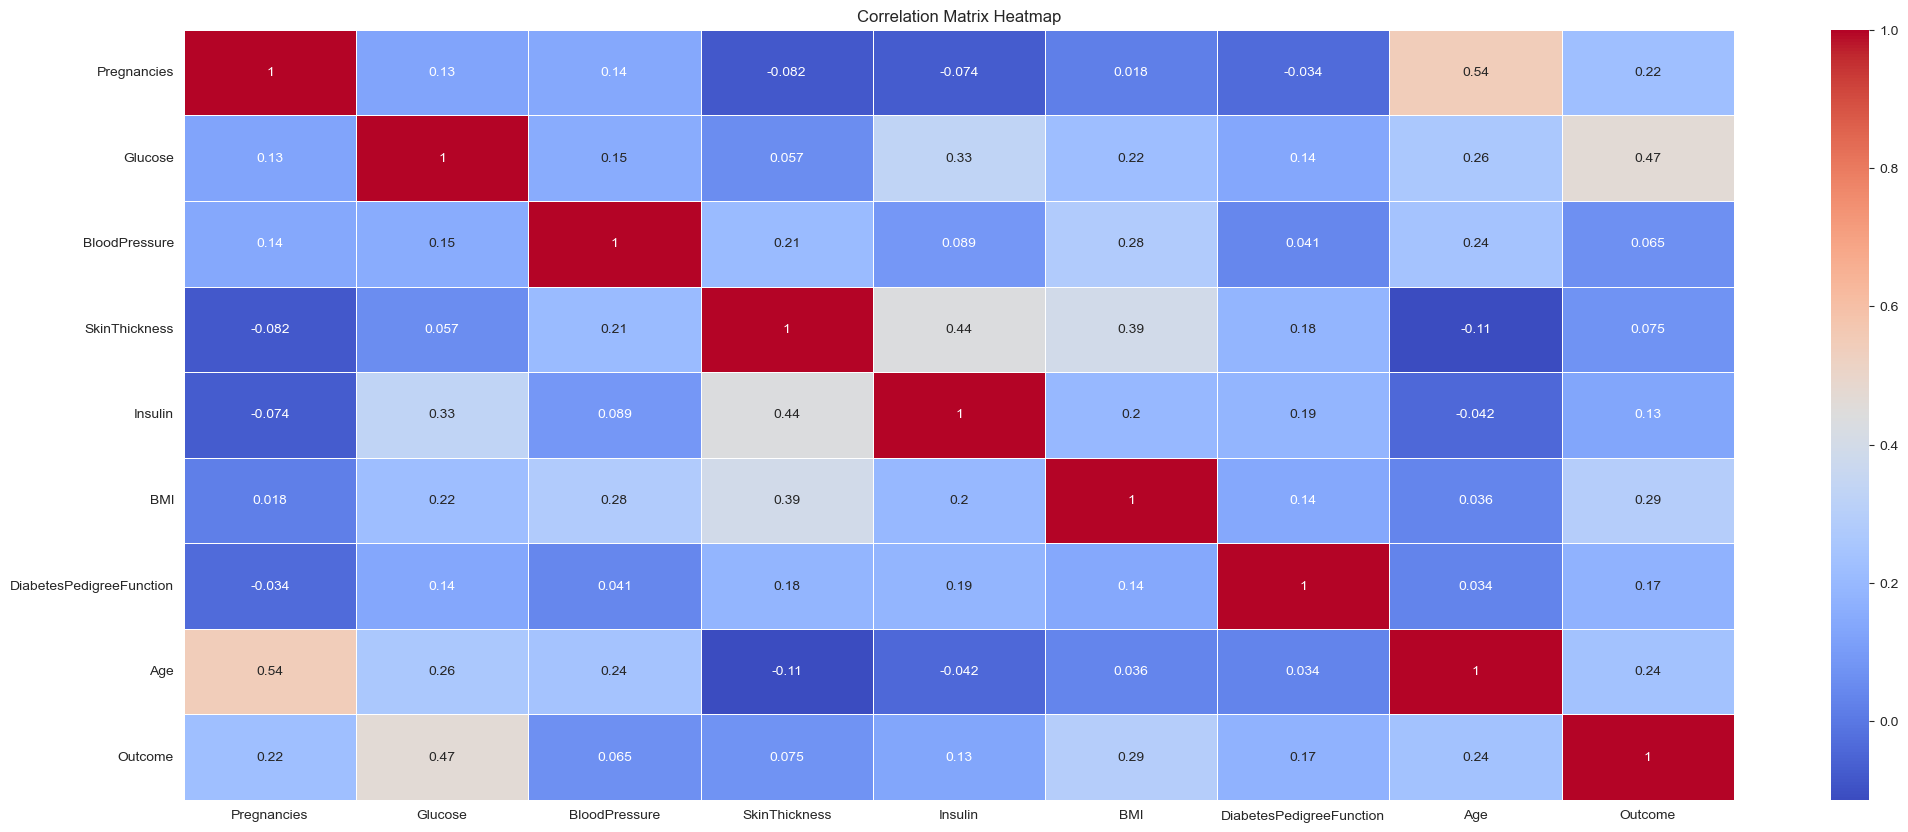

In [22]:
plt.figure(figsize=(25,10))
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
#Get feature correlated with each other
def correlation(dataset,threshold):
    col_corr=set() #Set of all names of correlated columns
    #row_corr=set() #Set of all names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]  #Getting name of the column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features=correlation(df_feat,0.5)
len(set(corr_features))
print(corr_features)

{'Age'}


If the performance of the classifer is low, the correlated features can be dropped to improve prediction by the classifers.

In [25]:
#Correlation of all the variables with the target variable
df_corr = df.corr()['Outcome'].abs().sort_values(ascending=False)
df_corr

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

#### f. Analysis of features with high correlation with respect to the target variable using pair plot 

In [ ]:
sns.set(style="ticks")
plt.figure(figsize=(10, 8))

sns.pairplot(df,hue='Outcome',palette='coolwarm')
# Increase the figure size

plt.show()

#### g.Jointplot used to explore the correlation between features with respect to the target.

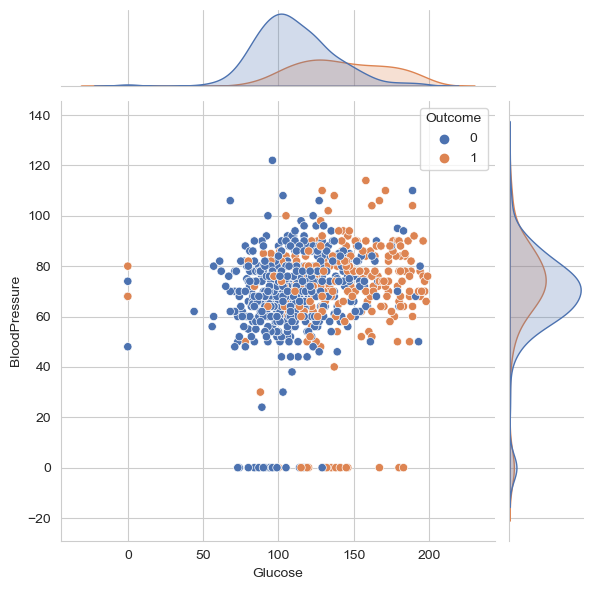

In [26]:
sns.jointplot(x='Glucose',y='BloodPressure',hue='Outcome',data=df,palette='deep') 

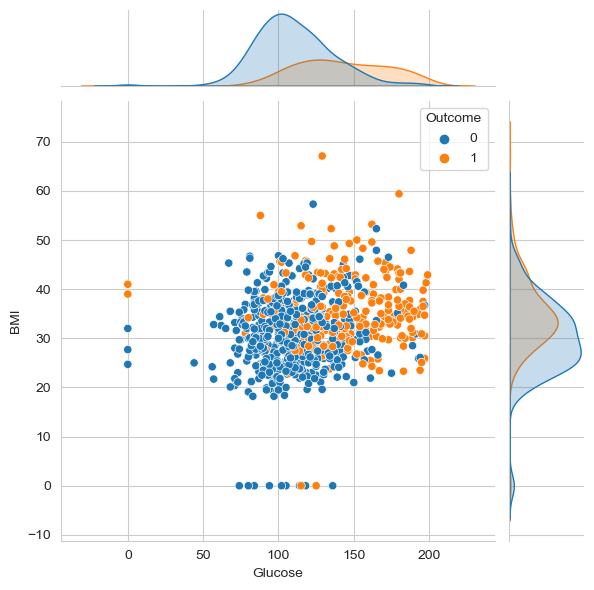

In [27]:
sns.jointplot(x='Glucose',y='BMI',hue='Outcome',data=df) 

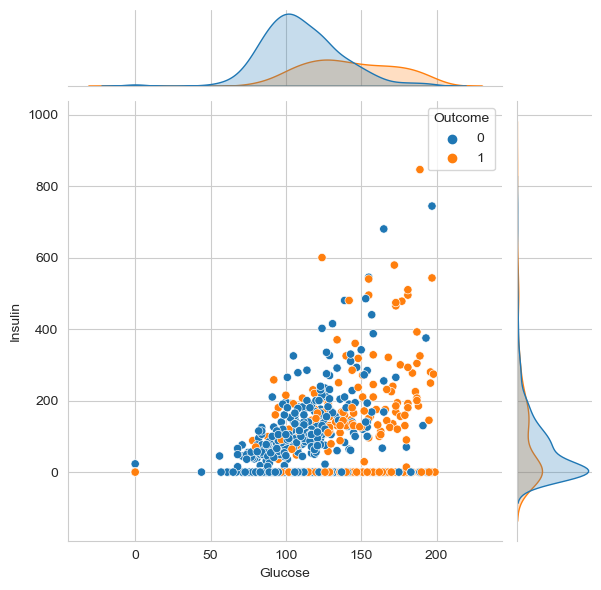

In [28]:
sns.jointplot(x='Glucose',y='Insulin',hue='Outcome',data=df) 

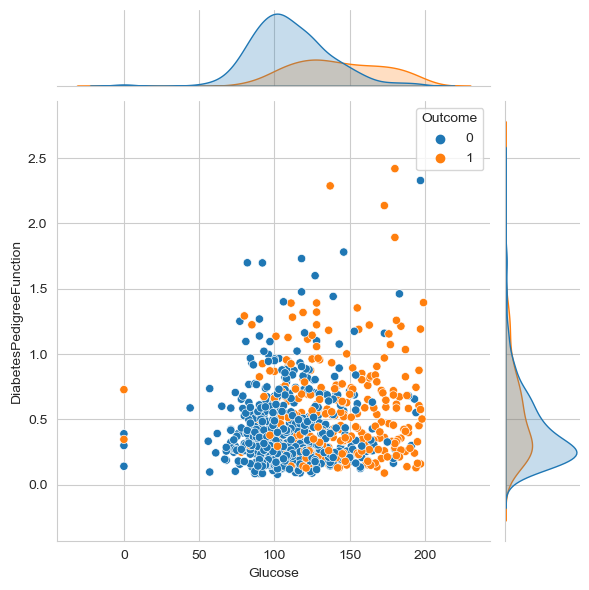

In [29]:
sns.jointplot(x='Glucose',y='DiabetesPedigreeFunction',hue='Outcome',data=df) 

####  h.Create boxplot for each feature
The best way to understand the relationship between a numeric variable and a categorical variable is through a boxplot.

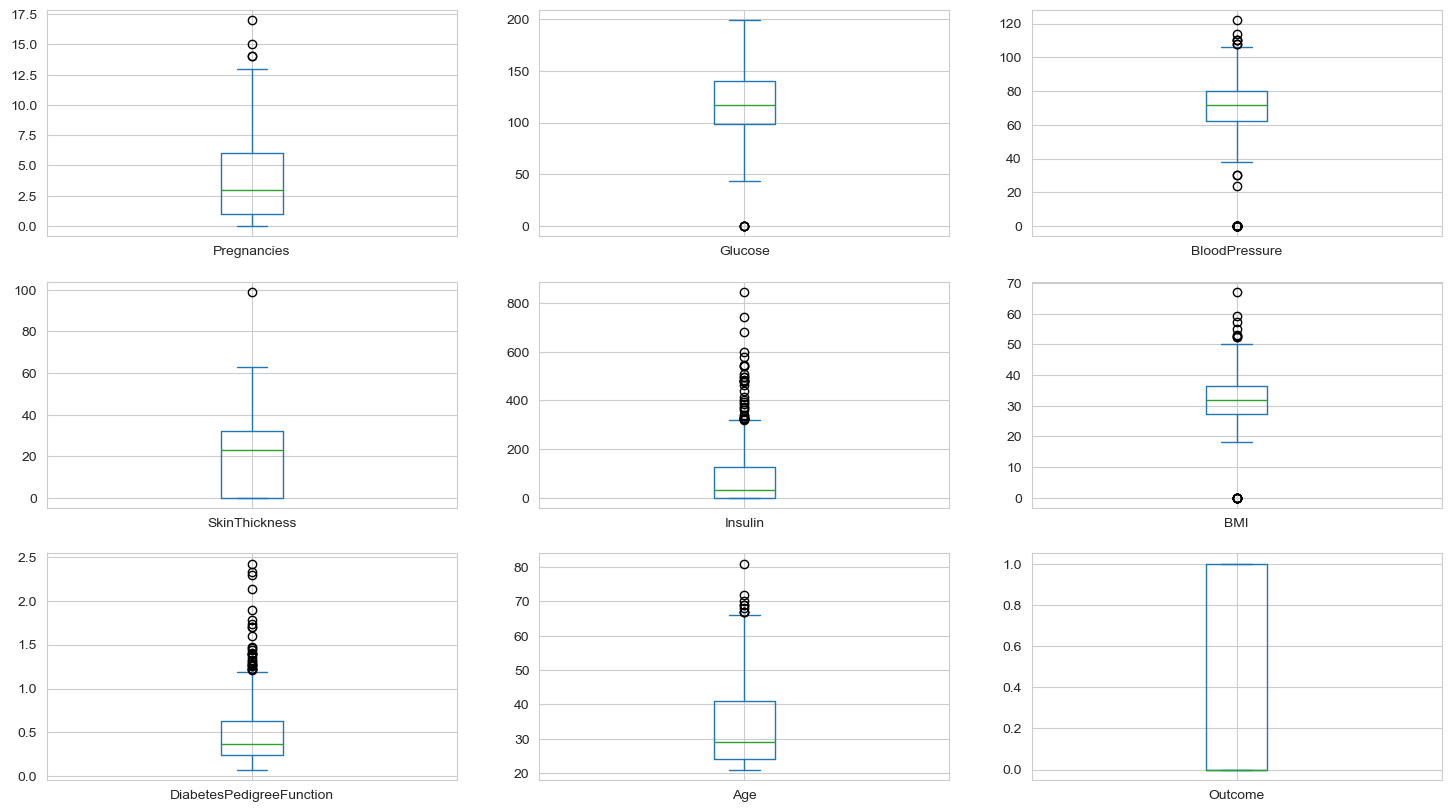

In [30]:
df.plot(kind = 'box',sharex = False, sharey = False, subplots = True, layout = (3,3), figsize = (18,10) );

### Outliers removal using 1.5 IQR method
- Outliers are typically defined as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
- IQR = Difference between 75th and 25th percentiles, or between upper and lower quartiles
- IQR = Q₃ − Q₁.
#### Steps to perform Outlier Detection by identifying the lowerbound and upperbound of the data:
1. Arrange your data in ascending order
2. Calculate Q1 ( the first Quarter)
3. Calculate Q3 ( the third Quartile)
4. Find IQR = (Q3 - Q1)
5. Find the lower Range = Q1 -(1.5 * IQR)
6. Find the upper Range = Q3 + (1.5 * IQR)

In [31]:
def remove_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Calculate the IQR
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    
    # Remove outliers from the dataset
    cleaned_data = data[~outliers]
    
    return cleaned_data

In [32]:
df=remove_outliers_iqr(df)

In [33]:
df=df.fillna(0)

In [34]:
print(len(df))

768


### Handle the imbalanced dataset

In [35]:
non_diabetic = df[df["Outcome"] == 0]
diabetic  = df[df["Outcome"] == 1]
print(non_diabetic.shape)
print(diabetic.shape)

(500, 9)
(268, 9)


In [36]:
diabetic_upsample = resample(diabetic,
             replace=True,
             n_samples=len(non_diabetic),
             random_state=42)

print(diabetic_upsample.shape)

(500, 9)


Outcome
0    500
1    500
Name: count, dtype: int64


<Axes: ylabel='Type'>

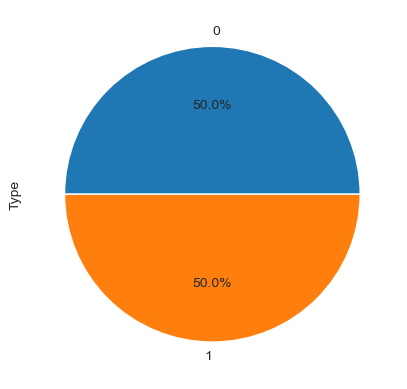

In [37]:
df_upsampled = pd.concat([non_diabetic, diabetic_upsample])

print(df_upsampled["Outcome"].value_counts())

df_upsampled.groupby('Outcome').size().plot(kind='pie',
                                       y = "Outcome",
                                       label = "Type",
                                       autopct='%1.1f%%')

### Scaling the features using pipeline

In [38]:
#Split the dataframe
df_feat = df_upsampled[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_target = df_upsampled[['Outcome']]

In [39]:
X=df_feat
y=df_target

In [40]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [41]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 8)

### Split training and testing dataset

In [42]:
X_train, X_test, y_train, y_test =train_test_split(X,np.ravel(y),test_size=0.30,random_state=52)

In [43]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 8) (700,)
(300, 8) (300,)


### Model evaluation

In [44]:
def evaluate_model_classification(true, predicted):
    accuracy=accuracy_score(true, predicted)
    F1_score=f1_score(true, predicted)
    Confusion_matrix=confusion_matrix(true, predicted)
    report=classification_report(true, predicted)
    return accuracy, F1_score, report

In [45]:
#Use these evaluation metrics for classification
models = {
    "Logistic Regression":LogisticRegression(),
    "Linear Discriminant Analysis" :LinearDiscriminantAnalysis(),
    "Support_vector Machine": svm.SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifer":  RandomForestClassifier(), 
    
}
model_list = []
F1_list =[]
accuracy_list=[]


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy,model_train_F1_score,model_train_report = evaluate_model_classification(y_train, y_train_pred)

    model_test_accuracy,model_test_F1_score,model_test_report= evaluate_model_classification(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_F1_score))
    print("".format(print(model_train_report)))
    

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_F1_score))
    print("".format(print(model_test_report)))
    
    F1_list.append(model_test_F1_score)
    accuracy_list.append(model_test_accuracy)
    
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.6886
- F1 Score: 0.6831
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       353
           1       0.69      0.68      0.68       347

    accuracy                           0.69       700
   macro avg       0.69      0.69      0.69       700
weighted avg       0.69      0.69      0.69       700


----------------------------------
Model performance for Test set
- Accuracy: 0.6967
- F1 Score: 0.6957
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       147
           1       0.71      0.68      0.70       153

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300




Linear Discriminant Analysis
Model performance for Training set
- Accuracy: 0.6957
- F1 Score: 0.6918
              precision    recall  f1-score

In [46]:
pd.DataFrame(list(zip(model_list, accuracy_list,F1_list)), columns=['Model Name', 'Accuracy','F1_Score']).sort_values(by=["F1_Score"],ascending=False)

,Model Name,Accuracy,F1_Score
4,Random Forest Classifer,0.870000,0.876190
3,Decision Tree,0.836667,0.844444
2,Support_vector Machine,0.743333,0.742475
0,Logistic Regression,0.696667,0.695652
1,Linear Discriminant Analysis,0.690000,0.686869


###  Select the best model 
1. Train the selected model and get metric values
2. If the metric values are as per expectation, get hyperparameters.
3. Save the trained model

In [47]:
model=RandomForestClassifier()

In [48]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred=model.predict(X_test)

In [50]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy :',accuracy)
f1score=f1_score(y_test,y_pred)
print('F1_score :',f1score)
mse=mean_squared_error(y_test,y_pred)
print('Mean_squared_error :',mse)

Accuracy : 0.8866666666666667
F1_score : 0.89171974522293
Mean_squared_error : 0.11333333333333333


In [51]:
matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       147
           1       0.87      0.92      0.89       153

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



Text(52.722222222222214, 0.5, 'True')

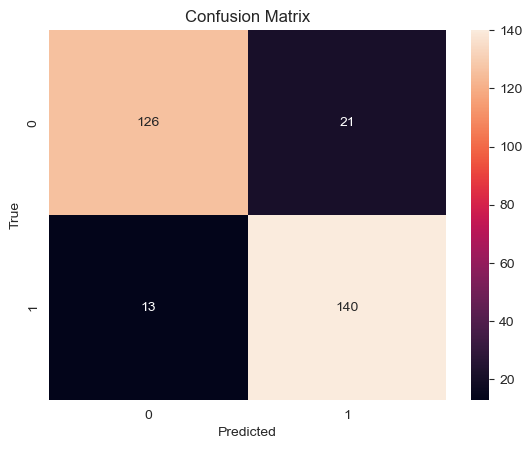

In [52]:
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [53]:
# Get hyperparameter values
hyperparameters = model.get_params()
print("Hyperparameters:", hyperparameters)

Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


#### Cross validating the Random forest classifer to check if the model is overfitting.

In [54]:
#Cross validation
k = 7  # You can adjust this value based on your needs

# Create a KFold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and specify the scoring metric (e.g., accuracy)
scores = cross_val_score(model, X, np.ravel(y), cv=kf, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation scores: [0.87412587 0.84615385 0.86713287 0.88111888 0.86013986 0.86713287
 0.87323944]
Mean CV accuracy: 0.8670062332034164


#### Overall, the mean cross-validation score of 0.867 indicates that, on average, the Random Forest model is performing well on the cross-validated sets.

### Download the model

In [55]:
# Save the trained model to a file
joblib.dump(model, 'trained_model.joblib')

['trained_model.joblib']

In [56]:
# Save hyperparameters to a file (can use a dictionary)
hyperparameters = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
joblib.dump(hyperparameters, 'hyperparameters.joblib')

['hyperparameters.joblib']

In [57]:
# Load the trained model
loaded_model = joblib.load('trained_model.joblib')

In [58]:
# Load hyperparameters
loaded_hyperparameters = joblib.load('hyperparameters.joblib')

### Validate the saved model 
1. Use the saved model to predict the values on test data or validation data of different sizes

In [59]:
## Test dataset size changed to 30% of the total dataset
predictions=loaded_model.predict(X_test)

In [60]:
accuracy=accuracy_score(y_test,predictions)
print('Accuracy :',accuracy)
f1score=f1_score(y_test,predictions)
print('F1_score :',f1score)
mse=mean_squared_error(y_test,predictions)
print('Mean_squared_error :',mse)

Accuracy : 0.8866666666666667
F1_score : 0.89171974522293
Mean_squared_error : 0.11333333333333333


Text(52.722222222222214, 0.5, 'True')

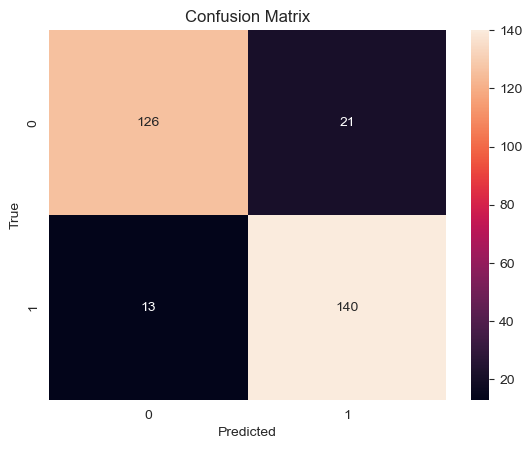

In [61]:
matrix = confusion_matrix(y_test,predictions)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')